## **1. Defining the Question**

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. 

The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.


### **a) Specifying the Question**
How  can we predict which individuals are most likely to have or use a bank account.

### **b) Defining the Metric for Success**

Areas to be covered to achieve the question objectives:

1) Exploratory Data Analysis   
2)Visualizations

3)Univariate, Bivariate and Multivariate analysis

4)Reduction techniques(PCA)

5)Mutiple Regression model

### **c) Understanding the context**

**Overview** 

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### **d) Recording the Experimental Design**
In order to work on the above problem, you need to do the following:

1.Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question.

2.Find and deal with outliers, anomalies, and missing data within the dataset.

3.Plot univariate and bivariate summaries recording your observations.

4.Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.

5.Challenge your solution by providing insights on how you can make improvements

### **e) Data Relevance**

The main dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:

FinAccess Kenya 2018. [Link] (Links to an external site.)
Finscope Rwanda 2016. [Link] (Links to an external site.)
Finscope Tanzania 2017. [Link] (Links to an external site.)
Finscope Uganda 2018. [Link] (Links to an external site.)
Dataset Files:

Variable Definitions: http://bit.ly/VariableDefinitions (Links to an external site.) 

Dataset: http://bit.ly/FinancialDataset (Links to an external site.) 

## **2. Reading the Data**




### 2.1 Importing libraries

In [0]:
#Import Pandas library
import pandas as pd
import pandas_profiling as pp

#Import numpy library
import numpy as np

#Import seaborn library
import seaborn as sns

#Import Pandas library
import matplotlib.pyplot as plt

%matplotlib inline

#Import sklearn library
import sklearn as sk

from sklearn import model_selection

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

#Import stats library
import statsmodels.api as sm

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")






###**2.2 Loading Dataset**

In [0]:
#Loading our variable definitions
dictionary = pd.read_csv('http://bit.ly/VariableDefinitions')
dictionary

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [2]:
#Loading our dataset
data = pd.read_csv('http://bit.ly/FinancialDataset')
data

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


### **2.3 View the dataset**

In [3]:
#Loading first five rows
data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
#Loading last five rows
data.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [0]:
# Determining the no. of records in our dataset
data.shape

(23524, 13)

In [0]:
# Checking whether each column has an appropriate datatype

data.info()
#All have correct data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [0]:
# Summary of the dataset
report = pp.ProfileReport(data)
report

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,13
Number of observations,23524
Total Missing (%),0.1%
Total size in memory,2.3 MiB
Average record size in memory,104.0 B
Numeric,3
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


## **3 Tidying the Dataset**


###3.1 Dropping unnecessary columns

In [0]:
#Dropping unncecessary columns. In our case it's unique Id. It doesn't relate to our research question.
data = data.drop(['uniqueid'], axis=1)

In [6]:
#Confirming that the uniqueid column has been dropped
data.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

### 3.2 Missing variables

In [7]:
#Check for missing data
data.isna().sum()

country                   14
year                       0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [0]:
#Dropping missing values
data =data.dropna()

In [9]:
#Confirm null values were dropped
data.isnull().sum()

country                   0
year                      0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [0]:
#New dataset shape
data.shape

(23343, 12)

### 3.3 Cleaning Dataset

In [10]:
#cleaning data using strip(),lower(), replace()
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print(data.columns)

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')


In [11]:
#Renaming the columns
data.rename(columns={'the_relathip_with_head':'the_relationship_with_head'}, inplace = True)
data.rename(columns={'level_of_educuation':'level_of_education'}, inplace = True)
data.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

## **4. Dealing with outliers/ Anomalies**

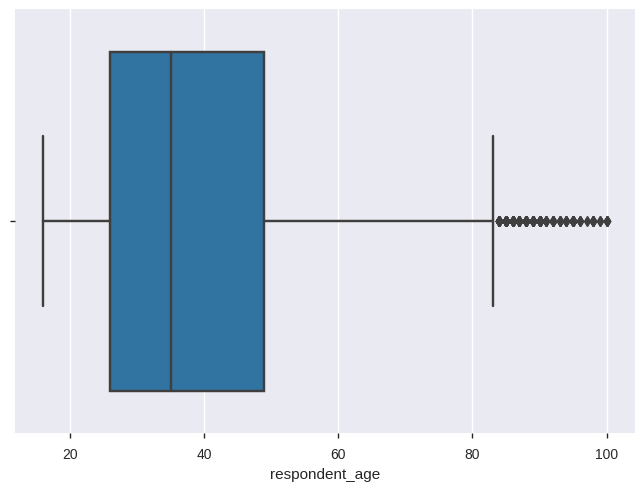

In [0]:
# Check if there are outliers for numeric columns
sns.boxplot(x=data['respondent_age'])
#Boxplot shows that between the ages of 80-100 there are outliers as they are not included in the box of other observation

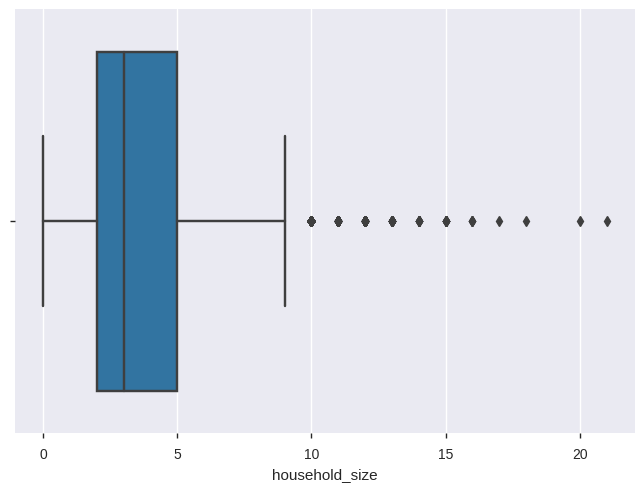

In [0]:
# Check if there are outliers for numeric columns
sns.boxplot(x=data['household_size'])

In [0]:
# The profile report indicates the year column had anomalies (2029,2059,2039)

#The data description of the year column (Year survey was done in) only included(2016,2017,2018)
#We have to remove the anomalies
indexnames = data[data['year'] > 2018].index

data.drop(indexnames, inplace = True)

##  5. Univariate Analysis

### 5.1 Categorical variables

In [0]:
data.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

In [0]:
# Creating our frequency table using value counts
# ---
data.has_a_bank_account.value_counts()

No     20044
Yes     3296
Name: has_a_bank_account, dtype: int64

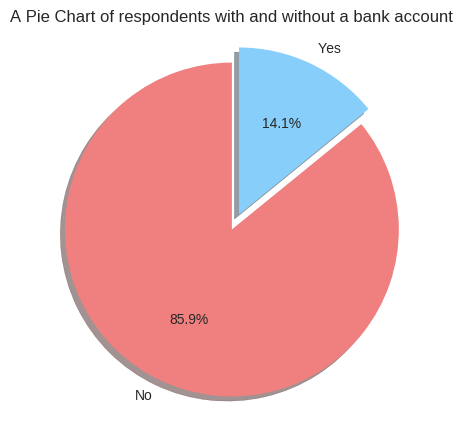

In [0]:
#Create a pie chart to indicate the has_a_bank_account column
column= data.has_a_bank_account.value_counts()
column

# accessing the data to plot

# labels
sizes= column.index
sizes

# values
column_value = column.values
column_value
# Colors
colors = ['lightcoral', 'lightskyblue']
# plotting the pie chart

plt.figure(figsize = (5,5), dpi = 100)
plt.pie(column_value, labels = sizes,colors= colors, autopct = '%1.1f%%', shadow = True, explode = (0.1,0), startangle = 90)
plt.axis('equal')
plt.title('A Pie Chart of respondents with and without a bank account')
plt.show()

#According to the pie chart only 14.1% of respondents have a bank account.85.9% do not.

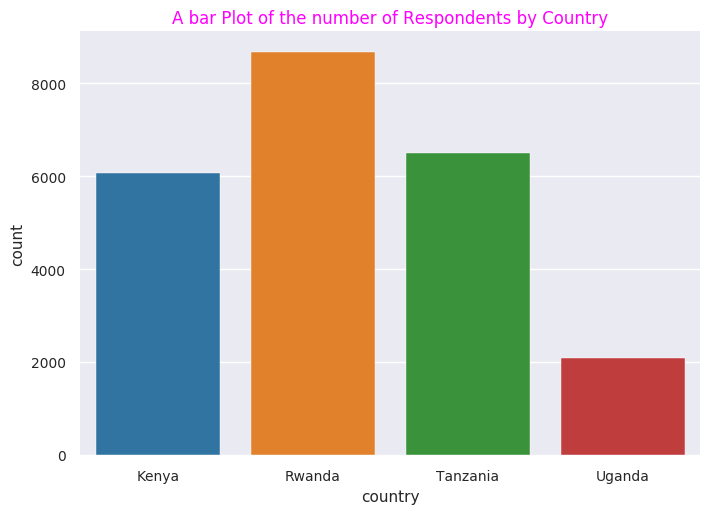

In [0]:
# Plotting a bar plot of the respondent country 


plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(data.country)
plt.title('A bar Plot of the number of Respondents by Country', color = 'magenta')
plt.show()

#Rwanda had the highest number of respondents

### **5.2 Numerical variables**

In [0]:
#Calculating the age most respondents are.
data['respondent_age'].mode()

# Most respondents are 30 years of age.

0    30.0
dtype: float64

In [0]:
data.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


Text(0.5, 1.0, 'Histogram showing respondents age with a bank account')

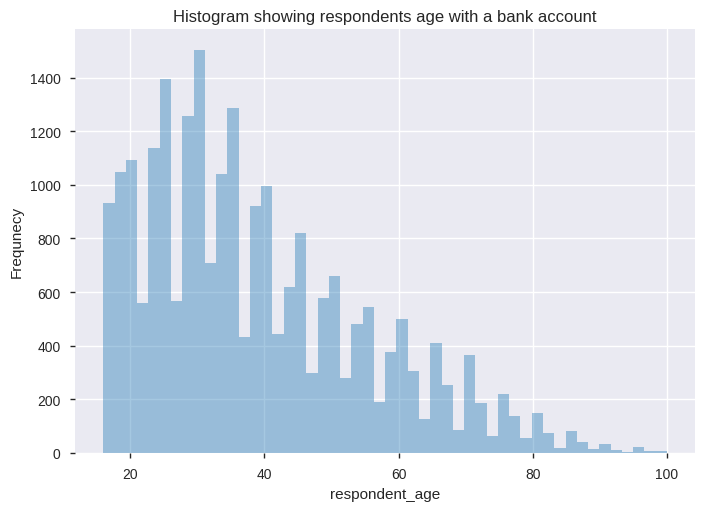

In [0]:
#Histogram to show relationship between age and having a bank account
df = data[data.has_a_bank_account == 'Yes']
sns.distplot(data['respondent_age'],  kde=False,label='Yes')
plt.ylabel('Frequnecy')
plt.title('Histogram showing respondents age with a bank account')

# From the histogram, people who are 30 years of age have most bank accounts

Text(0.5, 1.0, 'Histogram showing household size with a bank account')

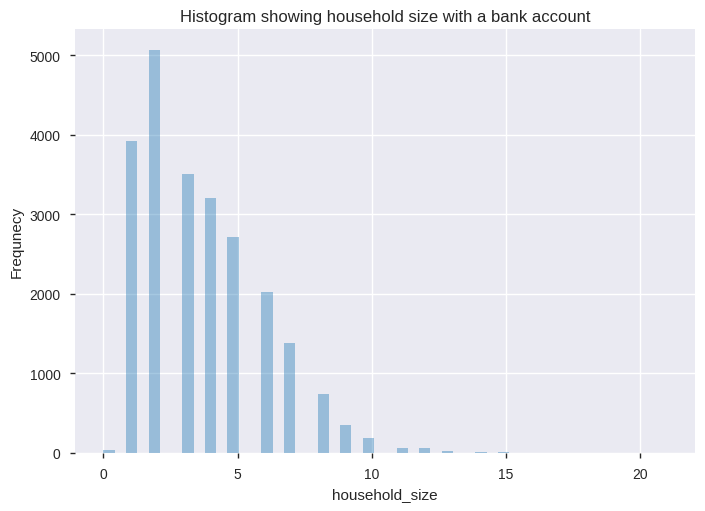

In [0]:
#Histogram to show relationship between household size and having a bank account
df = data[data.has_a_bank_account == 'Yes']
sns.distplot(data['household_size'],  kde=False,label='Yes')
plt.ylabel('Frequnecy')
plt.title('Histogram showing household size with a bank account')

#Histogram shows most households size 3 have highest number of bank accounts

## **6.Bivariate Analysis**

### 6.1 Numerical to numerical

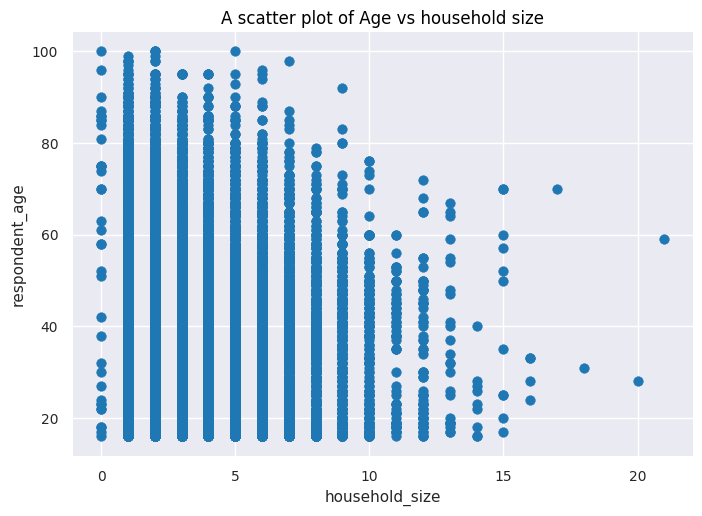

In [0]:
#  Plotting our scatterplot to compare two numerical the variables. We use matplotlib

# Specifying the chart size

plt.figure(dpi = 100)

# plotting our scatterplot using matplotlib
plt.scatter(data['household_size'], data['respondent_age'])

# Giving the scatterplot a title
plt.title('A scatter plot of Age vs household size', color = 'black')

# Labelling the x -axis
plt.xlabel('household_size')

# Labelling the y- axis
plt.ylabel('respondent_age')

# We then display our scatterplot 
plt.show()

**Correlation**

It is a statistical measure that describes the association between random variables.

Calculate the pearson correlation coefficient; It is the most widely used correlation coefficient.

Positive correlation is a relationship between two variables in which both variables move in the same direction.

Negative correlation/ inverse correlation is a relationship between two variables whereby they move in opposite directions. 

Correlation coefficients between -/+0.7 to -/+0.9 are generally considered strong, 

Between -/+0.4 to -/+ 0.6 are considered moderate, 

-/+0.1 to -/+0.3 are considered strong.

In [0]:
# Calculating the pearson coefficient
pearson_coeff = data["household_size"].corr(data["respondent_age"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = data["household_size"].corr(data["respondent_age"]) 
print(coeff)

#They have a very strong negative correlation

-0.1196711523415487
-0.1196711523415487


In [0]:
# Calculating the pearson coefficient of the entire dataframe

data.corr()

,year,household_size,respondent_age
year,1.000000,-0.052484,-0.018554
household_size,-0.052484,1.000000,-0.119671
respondent_age,-0.018554,-0.119671,1.000000


## **Multivariate Analysis**
Focus is on analyzing more than 2 statistical variables at once.
To analyse multiple categorical varibales we can turn then into dummies (zeros and ones)Pandas has a function which can turn a categorical variable into a series of zeros and ones,This makes them a lot easier to quantify and compare.

In [13]:
#First we Convert the categorical variables into dummy variables with ones and zeros

# We use pd.get_dummies that creates a new dataframe which consists of zeros and ones.

dummy = pd.get_dummies(data[['country', 'type_of_location', 'cell_phone_access', 'gender_of_respondent','the_relationship_with_head', 'marital_status', 'level_of_education', 'type_of_job']])
dummy.head()

,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [14]:
# in order to compare it to our original dataframe,
# we’re going to need to either merge or concatenate them to work with them properly.

# The dummy variables will be on the right side of our dataframe 
# As they are columns, I concatenate them on axis=1.

# concatenating 

dff = pd.concat([data, dummy], axis = 1)
dff.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


## **7 Reduction techniques**
Now we have a bunch of variables and can visualize patterns much better;
We can reduce our bunch of variables into 2 or 3 significant ones by use of PCA analysis
Without losing the essence of the data collected.

### **7.1 PCA Analysis**
is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset.The features are selected on the basis of variance that they cause in the output.The feature that causes highest variance is the first principal component.The feature that is responsible for second highest variance is considered the second principal component, and so on.

Note: principal components do not have any correlation with each other.
PCA can only be applied to numeric data hence categorical features are required to be converted into numerical features before PCA can be applied. (already done in the dummies above).


In [0]:
# Drop all categorical variables
# Start preprocessing step
# Step 1
# The first preprocessing step is to divide the dataset into;
# a feature set: X, 
# and corresponding label: y.


X = dff.drop(columns = ['country','has_a_bank_account',	'type_of_location',	'cell_phone_access',	'household_size',	'respondent_age',	'gender_of_respondent',	'the_relationship_with_head',	'marital_status',	'level_of_education' ,	'type_of_job'], axis = 1)
y = dff['has_a_bank_account']

In [55]:
#Confirming columns have been dropped
X.head()

,year,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [56]:
X.shape

(23343, 39)

In [33]:
#Confirming variable y
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: has_a_bank_account, dtype: object

In [0]:
# Step 2
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# split data table into data X and class labels y

X = dff.ix[:,0:38].values
y = dff.ix[:,38].values

In [0]:
# Standardizing. StandardScaler subtracts the mean from each features and then scale to unit variance.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
# Step 4
# Applying PCA
# Performing PCA using Python's Scikit-Learn library.

# The transform method returns the specified number of principal components.

# In the code below, we create a PCA object named pca1 
# We did not specify the number of components in the constructor. 
# Hence, all of the features in the feature set will be returned for both the training and test sets.
# 
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [107]:
# Step 5
# Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# The line of code below will output the "explained variance ratio".
# 


explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.10123581, 0.07687982, 0.06650848, 0.0573594 , 0.05374678,
       0.04537766, 0.04305747, 0.03741329, 0.03628977, 0.03321448,
       0.03095232, 0.02868996, 0.02799721, 0.02668303, 0.0263222 ,
       0.02607894, 0.0257759 , 0.02566292, 0.02530882, 0.02490164,
       0.02418122, 0.0239177 , 0.02278681, 0.0218601 , 0.02016967,
       0.0176035 , 0.01622455])

In [108]:
pca.n_components_

27

In [0]:
# Using the 24 Principal Components to train our algorithm
 
from sklearn.decomposition import PCA

pca = PCA(n_components=24)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# step 7
# Training and and Making Predictions 
# Here we use random forest classification for making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth = 2, random_state = 0)
classifier.fit(X_train, y_train)

# predicting the Test set results

y_pred = classifier.predict(X_test)


In [111]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [112]:
# Performance evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))



# From the output we see that with only one feature, 
# the random forest algorithm is able to correctly predict 4041 out of 4668 instances, 
# resulting in 85.94% accuracy.

[[8026    0]
 [1312    0]]
Accuracy 0.8594988220175627


### **7.2 Linear Discriminant Analysis (LDA)**

It is a dimensionality reduction technique. As the name implies dimensionality reduction techniques reduce the number of dimensions (i.e. variables) in a dataset while retaining as much information as possible.Aug 4, 2019

In [0]:
z = dff.iloc[:, 12:].values
s = dff.iloc[:, 2].values

In [69]:
print(z)

[[1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [70]:
print(s)

['Yes' 'No' 'Yes' ... 'No' 'No' 'No']


In [0]:
# Step b: 
# Divide data into training and test sets
#
from sklearn.model_selection import train_test_split

z_train, z_test, s_train, s_test = train_test_split(z, s, test_size=0.2, random_state=0)

In [0]:
# step c
# Performing feature scaling. 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
z_train = sc.fit_transform(z_train)
z_test = sc.transform(z_test)

In [0]:
# step d
# Performing LDA with Scikit-Learn. 


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=24)
z_train = lda.fit_transform(z_train, s_train)
z_test = lda.transform(z_test)

#n_components parameter of the LDA, refers to the number of linear discriminates that we want to retrieve. 

In [0]:
# Training and Making Predictions
# Using random forest classifier to evaluate the performance
# 

from sklearn.ensemble import RandomForestClassifier

classifier1 = RandomForestClassifier(max_depth=2, random_state=0)
classifier1.fit(z_train, s_train)

# # predicting the Test set results

s_pred = classifier1.predict(z_test)

In [75]:
# step f
# Evaluating the Performance of the algorithm
# Using a confusion matrix and the accuracy score.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm1 = confusion_matrix(s_test, s_pred)
print(cm1)
print('Accuracy' + str(accuracy_score(s_test, s_pred)))

# With 24 linear discriminants, the algorithm achieved an accuracy of 88.32%, 
# which is a little bit higher than the accuracy achieved with 24 principal component, which was %.

[[3956   52]
 [ 493  168]]
Accuracy0.8832726493895909


## **7.3 Multiple Regression Analysis**
It is a powerful technique used for predicting the unknown value of a variable from the known value of two or more variables- also called the predictors.
is a way of predicting a response Y on the basis of a single predictor variable X. 

It is assumed that there is approximately a linear relationship between X and Y. 
Mathematically, this relationship is represented as: Y ≈ ɒ + ß X + ℇ where ɒ and ß are two unknown constants that represent intercept and slope terms in the linear model 
and ℇ is the error in the estimation.


In [0]:
#Import libraries
from sklearn import model_selection

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

In [77]:
# Binary encoding our Target variable
# since it has two categories (yes/no)

dff['bank'] = dff['has_a_bank_account'].map( {'Yes':1, 'No':0} )
dff[['bank', 'has_a_bank_account']]

,bank,has_a_bank_account
0,1,Yes
1,0,No
2,1,Yes
3,0,No
4,0,No
...,...,...
23519,0,No
23520,0,No
23521,0,No
23522,0,No


In [78]:
# We have to confirm that we have no anomalies and null values in the new column created


dff.bank.unique()

dff.isnull().sum()

country                                               0
year                                                  0
has_a_bank_account                                    0
type_of_location                                      0
cell_phone_access                                     0
household_size                                        0
respondent_age                                        0
gender_of_respondent                                  0
the_relationship_with_head                            0
marital_status                                        0
level_of_education                                    0
type_of_job                                           0
country_Kenya                                         0
country_Rwanda                                        0
country_Tanzania                                      0
country_Uganda                                        0
type_of_location_Rural                                0
type_of_location_Urban                          

In [79]:
# Describing our data

print(dff.info())
print(dff.describe())
print(dff.columns)

# In our case, column has_a_bank_account is the dependent variable and the last 34 columns are the independent variables, 
# we want to  predict which respondents are most likely to have or use a bank account.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 51 columns):
country                                               23343 non-null object
year                                                  23343 non-null int64
has_a_bank_account                                    23343 non-null object
type_of_location                                      23343 non-null object
cell_phone_access                                     23343 non-null object
household_size                                        23343 non-null float64
respondent_age                                        23343 non-null float64
gender_of_respondent                                  23343 non-null object
the_relationship_with_head                            23343 non-null object
marital_status                                        23343 non-null object
level_of_education                                    23343 non-null object
type_of_job                                           

In [82]:
#Check correration of variables in dff dataframe
dff.corr()

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed,bank
year,1.000000,-0.048902,-0.019062,0.675032,-0.834738,0.013370,0.354983,-0.204277,0.204277,0.060700,-0.060700,-0.002012,0.002012,-0.056978,0.028436,-0.013429,0.079753,0.001533,-0.021909,0.015910,0.020932,-0.001750,0.018610,-0.040208,-0.016040,-0.091583,0.020932,-0.077997,0.111937,0.045817,0.121500,0.011344,-0.236796,0.051966,0.096666,-0.006596,-0.145557,0.076051,0.094639,0.090605,0.168529,0.109946
household_size,-0.048902,1.000000,-0.119709,0.077604,0.267892,-0.478471,0.178277,0.274053,-0.274053,-0.098194,0.098194,-0.010139,0.010139,0.203886,-0.244222,0.020714,0.014067,0.044006,0.108108,-0.130280,-0.008633,0.346245,-0.182487,-0.154069,0.001882,-0.006549,0.004556,-0.024364,0.103231,-0.096455,-0.023584,0.023653,0.186791,0.002531,-0.071347,-0.046453,0.013412,-0.064874,0.062425,0.009228,-0.163166,-0.023050
respondent_age,-0.019062,-0.119709,1.000000,0.029216,0.021949,-0.012148,-0.062890,0.047647,-0.047647,0.104016,-0.104016,-0.013336,0.013336,-0.302885,0.419702,-0.078833,-0.135222,-0.195265,-0.111184,-0.119133,0.005262,0.054602,-0.298241,0.462588,0.024052,0.360502,0.009465,-0.071281,-0.210638,-0.090398,-0.037470,-0.003898,0.153904,-0.005591,-0.062105,0.172066,-0.088899,-0.059457,-0.014297,-0.059271,0.000018,0.019645
country_Kenya,0.675032,0.077604,0.029216,1.000000,-0.455961,-0.368016,-0.186017,-0.033160,0.033160,-0.062119,0.062119,-0.019139,0.019139,0.065935,0.044148,-0.013188,0.045734,-0.116695,-0.052166,-0.061551,0.031255,0.145162,-0.112516,-0.007040,-0.020159,-0.054494,0.031255,-0.137356,0.175907,-0.002347,0.125536,-0.039452,0.045686,0.121594,0.067819,0.000797,-0.005225,-0.097693,-0.058574,0.169130,-0.153248,0.186120
country_Rwanda,-0.834738,0.267892,0.021949,-0.455961,1.000000,-0.478140,-0.241680,0.388252,-0.388252,-0.153753,0.153753,0.009269,-0.009269,0.115918,-0.034670,0.015516,-0.084645,-0.070674,0.023894,-0.092795,-0.014251,0.211040,-0.201726,0.052765,0.020745,0.099857,-0.014251,0.015743,-0.018465,-0.102468,-0.100780,0.010320,0.377569,-0.011536,-0.097962,-0.000769,0.164330,-0.126926,-0.032812,-0.079092,-0.351623,-0.058416
country_Tanzania,0.013370,-0.478471,-0.012148,-0.368016,-0.478140,1.000000,-0.195065,-0.430490,0.430490,0.205426,-0.205426,-0.019723,0.019723,-0.137602,0.017323,-0.007069,0.027261,0.147825,-0.006809,0.165983,-0.011502,-0.446244,0.394910,-0.035388,-0.012705,-0.034467,-0.011502,0.119859,-0.185853,0.144075,-0.028374,-0.045582,-0.341700,-0.080553,0.032851,0.014218,-0.060263,0.119606,-0.121137,-0.010691,0.415080,-0.087559
country_Uganda,0.354983,0.178277,-0.062890,-0.186017,-0.241680,-0.195065,1.000000,0.069429,-0.069429,0.033150,-0.033150,0.044620,-0.044620,-0.081389,-0.036271,0.005080,0.030222,0.066723,0.050305,-0.008949,-0.005814,0.120230,-0.105560,-0.022930,0.015772,-0.031208,-0.005814,-0.003857,0.052808,-0.

In [0]:
# Training our regression model
# First split up our data 
# into an X array that contains the features to train on, 
# and a y array with the target variable.


X = dff[['year','country_Kenya', 'country_Rwanda',
       'country_Tanzania', 'country_Uganda', 'type_of_location_Rural',
       'type_of_location_Urban', 'cell_phone_access_No',
       'cell_phone_access_Yes', 'gender_of_respondent_Female',
       'gender_of_respondent_Male', 'the_relationship_with_head_Child',
       'the_relationship_with_head_Head of Household',
       'the_relationship_with_head_Other non-relatives',
       'the_relationship_with_head_Other relative',
       'the_relationship_with_head_Parent',
       'the_relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'level_of_education_6', 'level_of_education_No formal education',
       'level_of_education_Other/Dont know/RTA',
       'level_of_education_Primary education',
       'level_of_education_Secondary education',
       'level_of_education_Tertiary education',
       'level_of_education_Vocational/Specialised training',
       'type_of_job_Dont Know/Refuse to answer',
       'type_of_job_Farming and Fishing',
       'type_of_job_Formally employed Government',
       'type_of_job_Formally employed Private',
       'type_of_job_Government Dependent', 'type_of_job_Informally employed',
       'type_of_job_No Income', 'type_of_job_Other Income',
       'type_of_job_Remittance Dependent', 'type_of_job_Self employed']]
y = dff['bank']



In [85]:
# Check X columns
X.head()

,year,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [86]:
#Check y columns
y.head()

0    1
1    0
2    1
3    0
4    0
Name: bank, dtype: int64

In [0]:
# The main aim is to create a model that generalises well to new data.
# Trained data is the data on which we apply the linear regression algorithm. 
# 40% of the data will go to the test data
# 60% remains in the training set.
# And finally we test that algorithm on the test data. 


# First we split the data into test set and training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [0]:
# Importing Linear Regression model from sklearn


from sklearn.linear_model import LinearRegression

In [0]:
# Then we create and train the model by fitting the linear regression model on the training data.

lm = LinearRegression()

results = lm.fit(X_train,y_train)

In [0]:
# Grabbing predictions off the test set and see how well it did

predictions = lm.predict(X_test)

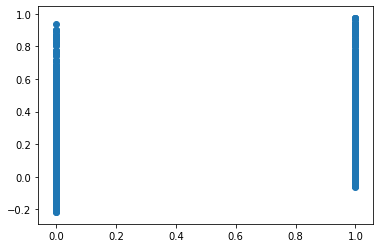

In [91]:
# visualising the prediction

plt.scatter(y_test, predictions)

In [92]:
# Coefficient of determination, R2, is the fraction (percentage) of variation in the response variable Y 
# that is explainable by the predictor variable X. It ranges between 0 (no predictability) to 1 (or 100%) 
# which indicates complete predictability.A high R2 indicates being able to predict response variable with less error.


r2_score(y_test, predictions) 

# The results indicates that the model explains 25.6% of the variability of the response data
# This indicates that the model is not a good fit.

0.25643736323665167

In [93]:
# The idea of linear regression model is to have the coefficients of the equation that will allow us to make a prediction. 

# We can return a python tuple containing an array with the coefficients and the intercept value as in the output

(lm.coef_, lm.intercept_)

(array([ 1.07148390e-04, -1.17879345e+12, -1.17879345e+12, -1.17879345e+12,
        -1.17879345e+12, -2.48255338e+12, -2.48255338e+12, -7.13670046e+11,
        -7.13670046e+11, -1.25086784e+12, -1.25086784e+12,  4.02665193e+11,
         4.02665193e+11,  4.02665193e+11,  4.02665193e+11,  4.02665193e+11,
         4.02665193e+11, -2.07733367e+12, -2.07733367e+12, -2.07733367e+12,
        -2.07733367e+12, -2.07733367e+12,  3.91612046e+12,  3.91612046e+12,
         3.91612046e+12,  3.91612046e+12,  3.91612046e+12,  3.91612046e+12,
         3.91612046e+12, -2.86635136e+12, -2.86635136e+12, -2.86635136e+12,
        -2.86635136e+12, -2.86635136e+12, -2.86635136e+12, -2.86635136e+12,
        -2.86635136e+12, -2.86635136e+12, -2.86635136e+12]),
 6250784094761.8545)

In [94]:
X2 = sm.add_constant(X.values)  
model = sm.OLS(y, X2).fit()  
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   bank   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     267.2
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        06:24:06   Log-Likelihood:                -4951.8
No. Observations:               23343   AIC:                             9968.
Df Residuals:                   23311   BIC:                         1.023e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3146      3.931     -0.080      0.9

From the output above, 
We see that most predictor (independent) variables are statistically insigninficant because all of their p-values are greater than 0.05.
Typically you use coefficient p-values to determine which terms to keep in the regression model. 
R-squared: 0.262 representing 26.2% meaning only that % of the variation in the dependent variable was acounted for by the model. 

The rest 73.8% of the variation in the dependent variable is accouted for by factors outside the regression model above.
This indicates that this is not the best model to use.
hence we will challenge the solution to see if its the best fit model.


For this we will use **Logistic regression**

In [0]:
# Training our regression model
# First split up our data 
# into an X array that contains the features to train on, 
# and a y array with the target variable.


A = dff[['year','country_Kenya', 'country_Rwanda',
       'country_Tanzania', 'country_Uganda', 'type_of_location_Rural',
       'type_of_location_Urban', 'cell_phone_access_No',
       'cell_phone_access_Yes', 'gender_of_respondent_Female',
       'gender_of_respondent_Male', 'the_relationship_with_head_Child',
       'the_relationship_with_head_Head of Household',
       'the_relationship_with_head_Other non-relatives',
       'the_relationship_with_head_Other relative',
       'the_relationship_with_head_Parent',
       'the_relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'level_of_education_6', 'level_of_education_No formal education',
       'level_of_education_Other/Dont know/RTA',
       'level_of_education_Primary education',
       'level_of_education_Secondary education',
       'level_of_education_Tertiary education',
       'level_of_education_Vocational/Specialised training',
       'type_of_job_Dont Know/Refuse to answer',
       'type_of_job_Farming and Fishing',
       'type_of_job_Formally employed Government',
       'type_of_job_Formally employed Private',
       'type_of_job_Government Dependent', 'type_of_job_Informally employed',
       'type_of_job_No Income', 'type_of_job_Other Income',
       'type_of_job_Remittance Dependent', 'type_of_job_Self employed']]
B = dff['bank']


In [0]:
# Step 2. we split the data into Training set and Test set


A_train, A_test, B_train, B_test = train_test_split(A,B,test_size = 0.2, random_state = 1)


In [0]:
# Step 3. Standardising the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

In [0]:
# Step 4
# Applying LDA
  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
A_train = lda.fit_transform(A_train, B_train)
A_test = lda.transform(A_test)

In [99]:
# Step 5.Training and Making Predictions

# We will be using random forest classification classifier to make predictions
  
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 1)
classifier.fit(A_train, B_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
# Step 6. Predicting the Test set results

  
B_pred = classifier.predict(A_test)
B_pred

array([0, 0, 1, ..., 0, 1, 1])

In [102]:
# Step 7.Performing evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confu_m = confusion_matrix(B_test, B_pred)
accu = accuracy_score(B_test, B_pred)
print(confu_m)
print(accu)


# Using Linear Discriminant Analysis in our logistic regression model, the algorithm achieved an accuracy of 87.2%, 
#

[[3874  116]
 [ 480  199]]
0.8723495395159563


In [103]:
# we create a logit report to show a summary of our predictions

logit_model = sm.Logit(B,A)

result = logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.291322
         Iterations 10
                                                  Results: Logit
Model:                                Logit                            Pseudo R-squared:                 0.285     
Dependent Variable:                   bank                             AIC:                              13664.6372
Date:                                 2019-12-09 06:43                 BIC:                              13922.4949
No. Observations:                     23343                            Log-Likelihood:                   -6800.3   
Df Model:                             31                               LL-Null:                          -9505.5   
Df Residuals:                         23311                            LLR p-value:                      0.0000    
Converged:                            1.0000                           Scale:                            1.0000    
No. Iterations:     

## **8.Final conclusion**

In [0]:
#The p-value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable. If there is no correlation, there is no association between the changes in the independent variable and the shifts in the dependent variable. In other words,
# there is insufficient evidence to conclude that there is effect at the population level.
# The p-values for all of the variables are Greater than 0.05,hence Logistic Regression model is not the best model to use for our prediction here.

# The Linear Regression Model though not the most robust here with an r2 = 26.2% is the better model to use for predictions here .